In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential


In [79]:
model=Sequential([
    Dense(1,input_shape=(1,),activation='linear')
])

In [80]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
X=np.array([[1],[2],[3]])
y=np.array([1,2,3]).T

In [82]:
model.compile(optimizer='sgd',loss='mse',metrics='mae')
model.fit(X,y,epochs=100)

Epoch 1/100


1/1 [==============================] - 1s 507ms/step - loss: 0.0160 - mae: 0.1171
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0127 - mae: 0.1038
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0100 - mae: 0.0920
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0079 - mae: 0.0815
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0063 - mae: 0.0722
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0050 - mae: 0.0639
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.0040 - mae: 0.0566
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.0031 - mae: 0.0500
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0025 - mae: 0.0442
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0020 - mae: 0.0390
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0016 - mae: 

In [83]:
model.get_weights()

[array([[1.0074627]], dtype=float32), array([-0.01696341], dtype=float32)]

In [84]:
pd.DataFrame({
    'true': np.squeeze(y),
    'pred': np.squeeze(model.predict(y))

})

1/1 [==============================] - 0s 142ms/step


,true,pred
0,1,0.990499
1,2,1.997962
2,3,3.005425


In [85]:
from keras.datasets import mnist

(X_train,y_train),(X_test,y_test)=mnist.load_data() 


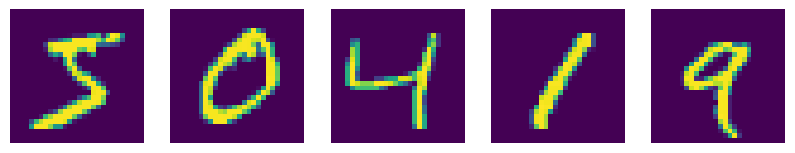

In [86]:
fig,ax=plt.subplots(1,5,figsize=(10,5)) #1 строка и 5 колонок в ней типо
#fig - общий рисунок в котором изображены все подрисунки
#ax -  это массив объектов подграфиков (axes), каждый из которых представляет отдельный график. В данном случае, так как у нас 5 колонок, ax будет массивом из 5 элементов.

for i in range(5):
    ax[i].imshow(X_train[i]) #помогает отображать изображения
    ax[i].axis('off') #Отрубаем разметку по осям x и y

In [87]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [88]:
indx=np.where((y_train==0) | (y_train==1))
y_train=y_train[indx]

In [89]:
X_train=X_train[indx]

In [90]:
indx2=np.where((y_test==0) | (y_test==1))
y_test=y_test[indx2]
X_test=X_test[indx2]

In [91]:
X_train=X_train/255.0
X_test=X_test/255.0

X_train.max(),X_test.min()

(1.0, 0.0)

In [92]:
from keras.utils import to_categorical 
import tensorflow as tf

y_test_cat=to_categorical(y_test)
y_train_cat=to_categorical(y_train)

In [94]:
y_train_cat, y_train

(array([[1., 0.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [1., 0.],
        [0., 1.]], dtype=float32),
 array([0, 1, 1, ..., 1, 0, 1], dtype=uint8))

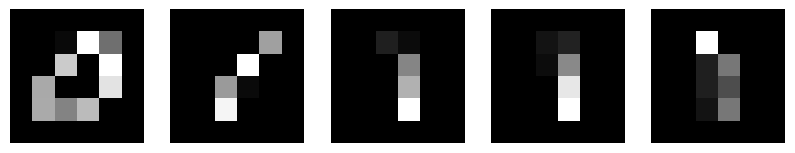

In [97]:
X_train_resized=tf.image.resize(X_train[...,np.newaxis],(6,6))[...,0] #пиздец
X_test_resized=tf.image.resize(X_test[...,np.newaxis],(6,6))[...,0]

fig,ax=plt.subplots(1,5,figsize=(10,5))

for i in range(5):
    ax[i].imshow(X_train_resized[i],cmap='gray')
    ax[i].axis('off')
  

In [98]:
X_train_resized.shape

TensorShape([12665, 6, 6])

In [ ]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics='accuracy')
